In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hubbard import Hubbard
from tqdm import tqdm
from datetime import datetime

size = 10
num_electrons = size ** 2
t = 1.0
u_values = np.logspace(-2, 2, 50)
repeats = 1500
equilibration_steps = 200

double_occupancy_results = []

for u in tqdm(u_values, desc="Processing u values"):
    avg_double_occupancy = 0

    for _ in range(repeats):
        # New lattice model gets initialized in AFM
        hubbard = Hubbard(size=size, u=u, t=t, num_electrons=num_electrons)
        hubbard.initialize_af()

        # Perform equilibration steps to reach probable state
        for _ in range(equilibration_steps):
            hubbard.simulate_step()

        # Calculate double occupancy directly
        avg_double_occupancy += hubbard.total_paired / num_electrons

    # Average over realizations and transform to percentage
    avg_double_occupancy /= repeats
    double_occupancy_results.append(avg_double_occupancy * 100)


timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

Processing u values: 100%|██████████| 50/50 [01:59<00:00,  2.40s/it]


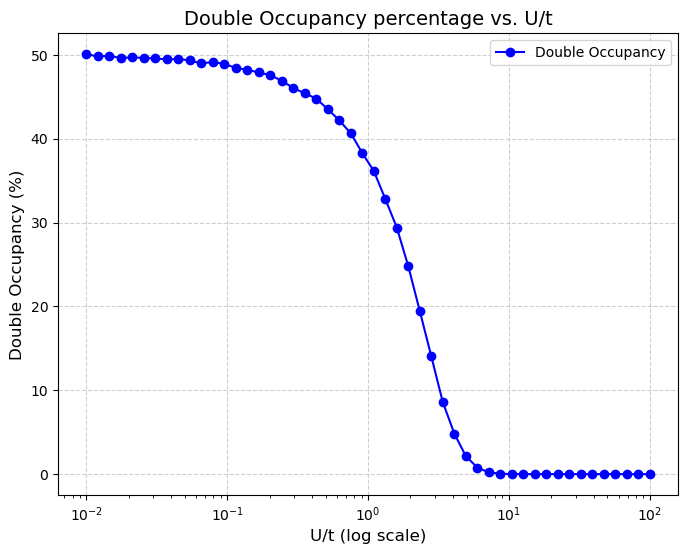

In [3]:
# Plot results
plt.figure(figsize=(8, 6))
plt.plot(u_values / t, double_occupancy_results, marker='o', linestyle='-', color='b', label='Double Occupancy')
plt.title("Double Occupancy percentage vs. U/t", fontsize=14)
plt.xscale("log")  # Logarithmic scale for U/t

plt.xlabel("U/t (log scale)", fontsize=12)
plt.ylabel("Double Occupancy (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig(f"DoubleOccupancyDim{size}Rep{repeats}Steps{equilibration_steps}_{timestamp}.png")
plt.legend()
plt.show()